In [2]:
import pandas as pd
df=pd.read_csv(r"D:\exchange_rate.csv")
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [4]:
df.shape

(7588, 2)

In [5]:
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


<Axes: >

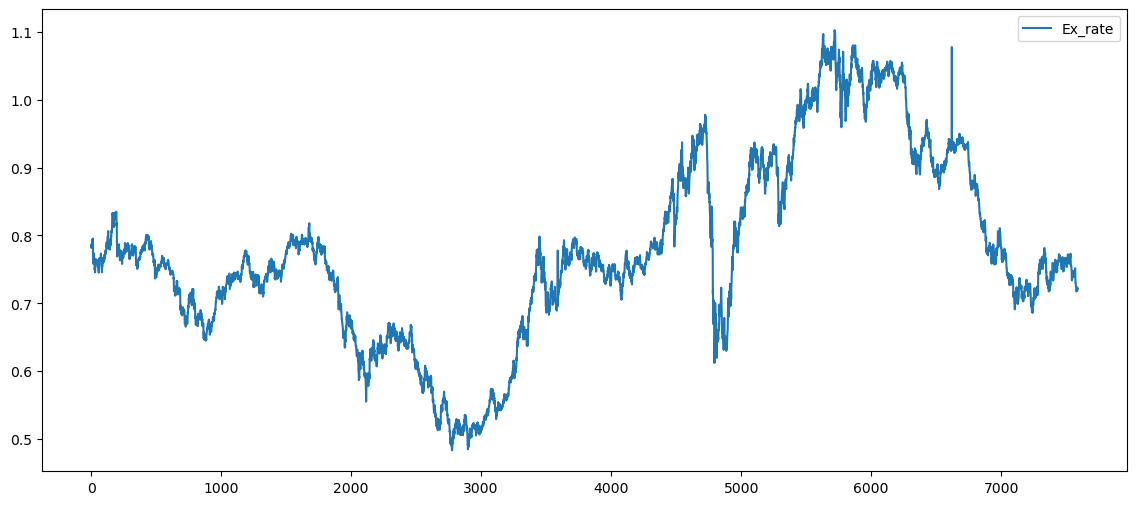

In [6]:
import matplotlib.pyplot as plt
df.plot(figsize=(14,6))

In [7]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
  dftest=adfuller(df['Ex_rate'],autolag='AIC')
  print("1. ADF :",dftest[0])
  print("2. P-value:",dftest[1])
  print("3. Num of Lags",dftest[2])
  print("4. Num of Observation used for ADF Regression and Critical Values Calculation:",dftest[3])
  print("5. Critical values:",dftest[4])
  for key, val in dftest[4].items():
      print("\t",key,":",val)

In [8]:
ad_test(df['Ex_rate'])

1. ADF : -1.664994180738073
2. P-value: 0.44923273535983155
3. Num of Lags 1
4. Num of Observation used for ADF Regression and Critical Values Calculation: 7586
5. Critical values: {'1%': -3.4312123140180137, '5%': -2.861921078147796, '10%': -2.5669728434336108}
	 1% : -3.4312123140180137
	 5% : -2.861921078147796
	 10% : -2.5669728434336108


In [9]:
!pip install pmdarima

In [10]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [11]:
stepwise_fit=auto_arima(df['Ex_rate'],trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-56098.154, Time=5.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-55972.211, Time=2.56 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-56102.338, Time=1.32 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-56100.772, Time=4.88 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-55974.195, Time=0.58 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-56100.340, Time=3.22 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-56100.341, Time=3.56 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-56098.328, Time=7.39 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-56104.319, Time=0.79 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-56102.321, Time=0.75 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-56102.322, Time=2.62 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-56102.753, Time=0.92 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-56100.316, Time=3.01 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 36.674 sec

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7588
Model:               SARIMAX(1, 1, 0)   Log Likelihood               28054.159
Date:                Wed, 03 Sep 2025   AIC                         -56104.319
Time:                        06:43:07   BIC                         -56090.450
Sample:                             0   HQIC                        -56099.559
                               - 7588                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1314      0.002    -64.439      0.000      -0.135      -0.127
sigma2      3.595e-05   9.94e-08    361.720      0.000    3.58e-05    3.61e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2865011.36
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
from statsmodels.tsa.arima_model import ARIMA
df.shape

(7588, 2)

In [13]:
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(7558, 2) (30, 2)


In [14]:
from statsmodels.tsa.arima.model import ARIMA

In [15]:
model=ARIMA(train['Ex_rate'],order=(1,1,0))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 7558
Model:                 ARIMA(1, 1, 0)   Log Likelihood               27934.469
Date:                Wed, 03 Sep 2025   AIC                         -55864.938
Time:                        06:43:44   BIC                         -55851.078
Sample:                             0   HQIC                        -55860.180
                               - 7558                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1317      0.002    -64.444      0.000      -0.136      -0.128
sigma2      3.604e-05   9.99e-08    360.870      0.000    3.58e-05    3.62e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2846350.67
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.98   Skew:                             0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
print(pred)
pred.index=df.index[start:end+1]
print(pred)

7558    0.744095
7559    0.744155
7560    0.744147
7561    0.744148
7562    0.744148
7563    0.744148
7564    0.744148
7565    0.744148
7566    0.744148
7567    0.744148
7568    0.744148
7569    0.744148
7570    0.744148
7571    0.744148
7572    0.744148
7573    0.744148
7574    0.744148
7575    0.744148
7576    0.744148
7577    0.744148
7578    0.744148
7579    0.744148
7580    0.744148
7581    0.744148
7582    0.744148
7583    0.744148
7584    0.744148
7585    0.744148
7586    0.744148
7587    0.744148
Name: predicted_mean, dtype: float64
7558    0.744095
7559    0.744155
7560    0.744147
7561    0.744148
7562    0.744148
7563    0.744148
7564    0.744148
7565    0.744148
7566    0.744148
7567    0.744148
7568    0.744148
7569    0.744148
7570    0.744148
7571    0.744148
7572    0.744148
7573    0.744148
7574    0.744148
7575    0.744148
7576    0.744148
7577    0.744148
7578    0.744148
7579    0.744148
7580    0.744148
7581    0.744148
7582    0.744148
7583    0.744148
7584    0.7

<Axes: >

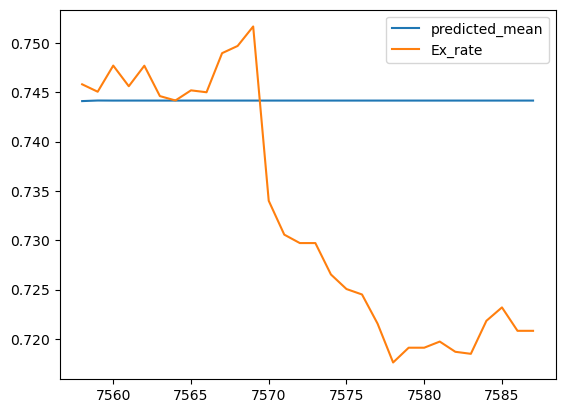

In [17]:
pred.plot(legend=True)
test['Ex_rate'].plot(legend=True)

In [18]:
test['Ex_rate'].mean()

0.732738

In [19]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Ex_rate']))
print(rmse)

0.016634697604867923


In [20]:
model2=ARIMA(df['Ex_rate'],order=(0,0,0))
model2=model2.fit()
df.tail()

,date,Ex_rate
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825
7587,10-10-2010 00:00,0.720825


In [21]:
pred = model2.predict(start=len(df), end=len(df)+30, typ='levels')
pred = pred.rename('ARIMA Predictions')
print(pred)

7588    0.776969
7589    0.776969
7590    0.776969
7591    0.776969
7592    0.776969
7593    0.776969
7594    0.776969
7595    0.776969
7596    0.776969
7597    0.776969
7598    0.776969
7599    0.776969
7600    0.776969
7601    0.776969
7602    0.776969
7603    0.776969
7604    0.776969
7605    0.776969
7606    0.776969
7607    0.776969
7608    0.776969
7609    0.776969
7610    0.776969
7611    0.776969
7612    0.776969
7613    0.776969
7614    0.776969
7615    0.776969
7616    0.776969
7617    0.776969
7618    0.776969
Name: ARIMA Predictions, dtype: float64


<Axes: >

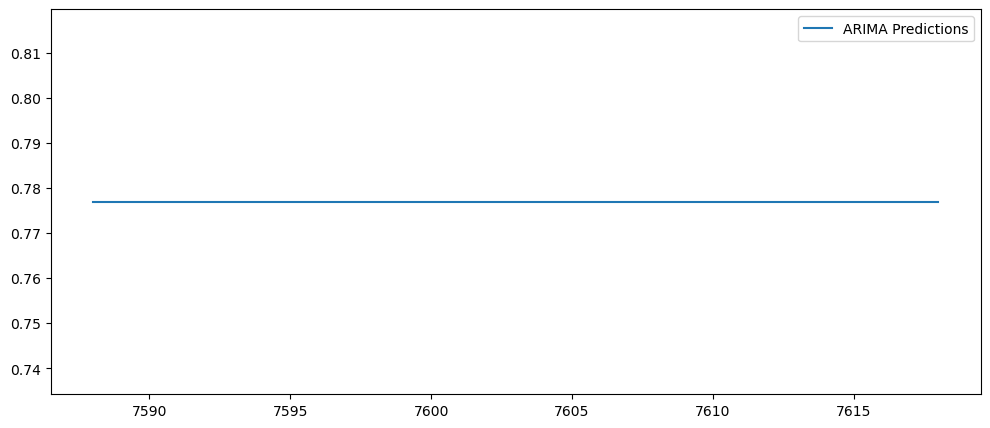

In [22]:
pred.plot(figsize=(12,5),legend=True)

In [3]:
df['Ex_rate'] = df['Ex_rate'].fillna(method='ffill')
mean, std = df['Ex_rate'].mean(), df['Ex_rate'].std()
anomalies = df[(df['Ex_rate'] < mean - 3*std) | (df['Ex_rate'] > mean + 3*std)]
print("Detected anomalies", anomalies)

Detected anomalies Empty DataFrame
Columns: [date, Ex_rate]
Index: []


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21604\751817989.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Ex_rate'] = df['Ex_rate'].fillna(method='ffill')


In [4]:
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
model = ExponentialSmoothing(
    train['Ex_rate'],
    trend="add",
    seasonal=None,
    initialization_method="estimated")
fit_model = model.fit()
forecast = fit_model.forecast(len(test))

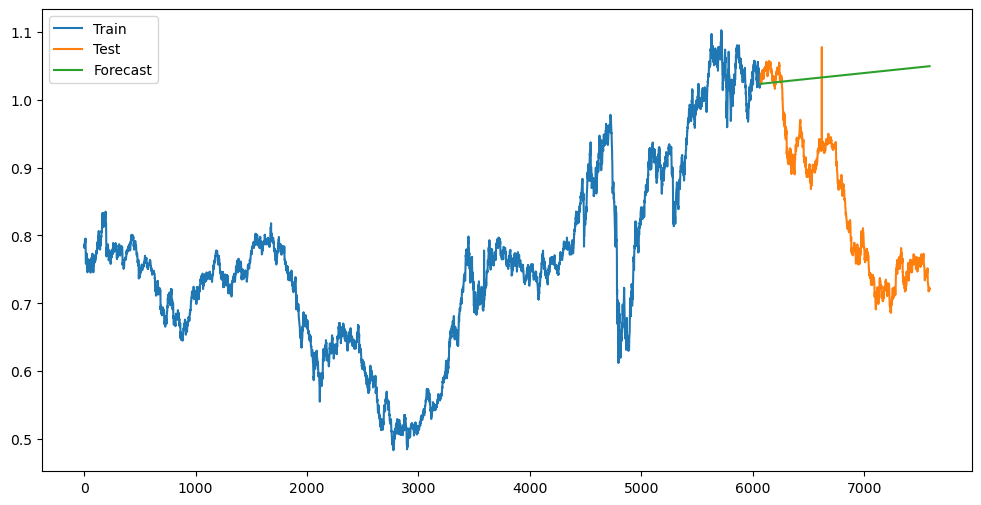

In [6]:
plt.figure(figsize=(12,6))
plt.plot(train['Ex_rate'], label="Train")
plt.plot(test['Ex_rate'], label="Test")
plt.plot(forecast, label="Forecast")
plt.legend()
plt.show()

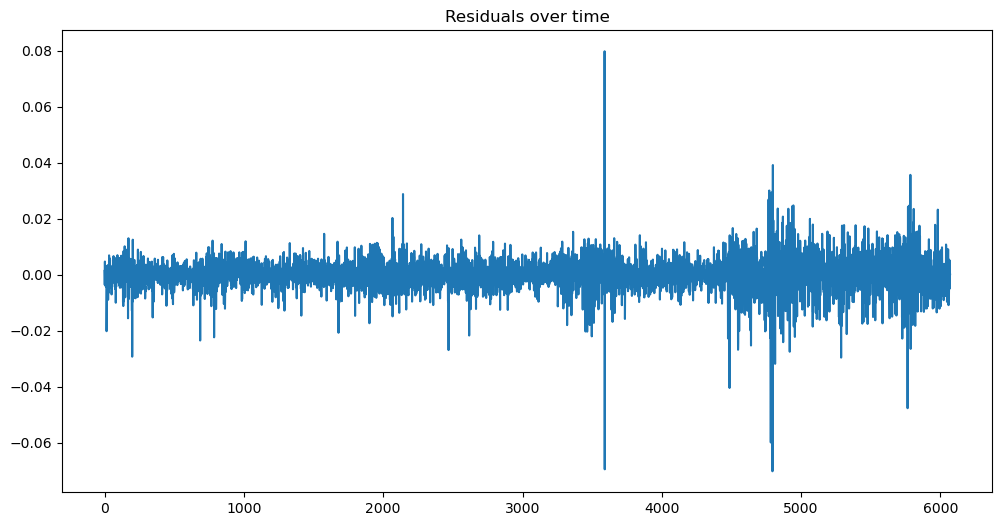

Residual Mean: 2.9603077818106482e-05
Residual Std: 0.0057322238409059706


In [7]:
residuals=train['Ex_rate'] - fit_model.fittedvalues
plt.figure(figsize=(12,6))
plt.plot(residuals)
plt.title("Residuals over time")
plt.show()
print("Residual Mean:", residuals.mean())
print("Residual Std:", residuals.std())

In [8]:
mae = mean_absolute_error(test['Ex_rate'], forecast)
mape = mean_absolute_percentage_error(test['Ex_rate'], forecast) * 100
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape, "%")

Mean Absolute Error (MAE): 0.19027436194560823
Mean Absolute Percentage Error (MAPE): 24.41281801209052 %
